### Проект e-commerce: вариант 1
<!--Скопировал разметку от сюда https://lab.karpov.courses/learning/85/module/1060/lesson/9080/26646/118685/-->
<!--удалил css классы и некоторые символы и отформатировал чтоб читаемо было-->
<p>Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:</p>
1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)</p>
2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)</p>
3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)</p>
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)</p>
5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти <a href="https://vc.ru/s/productstar/134090-chto-takoe-kogortnyy-analiz" target="_blank">тут</a>. (10 баллов)</p>
6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти <a href="https://guillaume-martin.github.io/rfm-segmentation-with-python.html" target="_blank">тут</a>. (35 баллов)</p>
<br/>
	<b>Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.</b>
</p>

<p>— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5</p>

#### Файлы

##### olist_customers_datase.csv
<ul>
	<li>
		<b>
			<a href="https://disk.yandex.ru/d/FUi5uSd6BfG_ig" target="_blank">olist_customers_datase.csv</a>— таблица с уникальными идентификаторами пользователей</b>
	</li>
</ul>
<p>
	<i>
		<font color="#ff5533">customer_id </font>
	</i>— позаказный идентификатор пользователя</p>
<p>
	<i>
		<font color="#ff5533">customer_unique_id </font>
	</i>— уникальный идентификатор пользователя (аналог номера паспорта)</p>
<p>
	<font color="#ff5533">
		<i>customer_zip_code_prefix </i>
	</font>— почтовый индекс пользователя</p>
<p>
	<i>
		<font color="#ff5533">customer_city</font>
	</i> — город доставки пользователя</p>
<p>
	<i>
		<font color="#ff5533">customer_state</font>
	</i> — штат доставки пользователя</p>

##### olist_orders_dataset.csv
<ul>
	<li>
		<b>
			<a href="https://disk.yandex.ru/d/t9Li4JOfgxuUrg" target="_blank">olist_orders_dataset.csv</a>—таблица заказов</b>
	</li>
</ul>
<p>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)</p>
<p>
	<i>
		<font color="#ff5533">customer_id</font>
	</i> — позаказный идентификатор пользователя</p>
<p>
	<i>
		<font color="#ff5533">order_status</font>
	</i> — статус заказа</p>
<p>
	<font color="#ff5533">
		<i>order_purchase_timestamp </i>
	</font>— время создания заказа</p>
<p>
	<i>
		<font color="#ff5533">order_approved_at </font>
	</i>— время подтверждения оплаты заказа</p>
<p>
	<i>
		<font color="#ff5533">order_delivered_carrier_date</font>
	</i> — время передачи заказа в логистическую службу</p>
<p>
	<font color="#ff5533">
		<i>order_delivered_customer_date</i>
	</font> — время доставки заказа</p>
<p>
	<i>
		<font color="#ff5533">order_estimated_delivery_date</font>
	</i> — обещанная дата доставки</p>

##### olist_order_items_dataset.csv
<ul>
	<li>
		<a href="https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw" target="_blank">olist_order_items_dataset.csv</a>— <b>товарные позиции, входящие в заказы</b>
	</li>
</ul>
<p>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)</p>
<p>
	<i>
		<font color="#ff5533">order_item_id</font>
	</i> — идентификатор товара внутри одного заказа</p>
<p>
	<font color="#ff5533">
		<i>product_id</i>
	</font> — ид товара (аналог штрихкода)</p>
<p>
	<i>
		<font color="#ff5533">seller_id</font>
	</i>—ид производителя товара</p>
<p>
	<i>
		<font color="#ff5533">shipping_limit_date</font>
	</i> — максимальная дата доставки продавцом для передачи заказа партнеру по логистике</p>
<p>
	<font color="#ff5533">
		<i>price</i>
	</font> — цена за единицу товара</p>
<p>
	<i>
		<font color="#ff5533">freight_value</font>
	</i> — вес товара</p>

#### Статусы заказов в таблице <font color="#ff5533">olist_orders_dataset:</font>
<ul>
	<li>created — создан</li>
</ul>
<ul>
	<li>approved — подтверждён</li>
</ul>
<ul>
	<li>invoiced — выставлен счёт</li>
</ul>
<ul>
	<li>processing — в процессе сборки заказа</li>
</ul>
<ul>
	<li>shipped — отгружен со склада</li>
</ul>
<ul>
	<li>delivered — доставлен пользователю </li>
</ul>
<ul>
	<li>unavailable — недоступен</li>
</ul>
<ul>
	<li>canceled — отменён</li>
</ul>

In [6]:
# в этом блоке будем импортировать нужные зависимости и библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

import Configs.configsutils as utils

%matplotlib inline

### 1. Подготовим источники данных и входные параметры

#### 1.1 Источники данных

* У нас есть 3 CSV-файла, которые на момент 2022.07.10 доступны в гугл диске

* Чтобы не хранить большие файлы в репозитории, сделаем 2 JSON файла формата:

<code>
<pre>
{
    "sources" : {
        "data_src_name" : {
            "name" : "file.csv",
            "src"  : "../../../first_project_data/file.csv"
        }
    }
}
</pre>
</code>

* <font color="#ff5533">data_src_local.json</font> первый будет ссылаться на локальные файлы
* <font color="#ff5533">data_src_remote.json</font> второй будет ссылаться на файлы, расположенные удаленно


<p>файлы можно найти в директории <font color="#ff5533">Configs</font>

#### 1.2 Входные параметры

<p>Определим <font color="#ff5533">main_config.json</font> для хранения и настройки входных данных. Например, в виде профайлов</p>

<p>файл можно найти в директории <font color="#ff5533">Configs</font> 

In [7]:
# определим data source names (aka prefix dsn):
dsn_olist_customers_dataset = "olist_customers_dataset"
dsn_olist_order_items_dataset = "olist_order_items_dataset"
dsn_olist_orders_dataset = "olist_orders_dataset"

# определим с какими данными работаем (local|remote)
# profile = "local"
profile = "remote"

# определяем путь до основного конфига
config_dir = './Configs'
main_config_path = f'{config_dir}/main_config.json'

In [8]:
# считываем основной конфиг
main_config = utils.Config(utils.read_json(main_config_path), config_dir)

main_config.select_profile(profile)

print(f'текущий профиль: {profile} : {main_config.current.path}')

# считываем конфиг источника данных

data_src = utils.DataCollection(utils.read_json(main_config.current.path))

текущий профиль: remote : ./Configs/data_src_remote.json


In [9]:
# проверим конфиг данных
# по заданию у нас три файла
files = [dsn_olist_customers_dataset, dsn_olist_order_items_dataset, dsn_olist_orders_dataset]

actual = utils.test_DataCollection(data_src, files, main_config.current.path)

print(actual)

(True, 'тексты пройдены')


### 2. Считываем данные

#### Описание olist_customers_datase.csv
таблица с уникальными идентификаторами пользователей
<font size="-1">
<br/>
	<i>
		<font color="#ff5533">customer_id </font>
	</i>— позаказный идентификатор пользователя
<br/>
	<i>
		<font color="#ff5533">customer_unique_id </font>
	</i>— уникальный идентификатор пользователя (аналог номера паспорта)
<br/>
	<font color="#ff5533">
		<i>customer_zip_code_prefix </i>
	</font>— почтовый индекс пользователя
<br/>
	<i>
		<font color="#ff5533">customer_city</font>
	</i> — город доставки пользователя
<br/>
	<i>
		<font color="#ff5533">customer_state</font>
	</i> — штат доставки пользователя
</font>

In [10]:
df_customers = pd.read_csv(data_src.data[dsn_olist_customers_dataset].src)

#### Описание olist_orders_dataset.csv
таблица заказов
<font size="-1">
<br/>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)
<br/>
	<i>
		<font color="#ff5533">customer_id</font>
	</i> — позаказный идентификатор пользователя
<br/>
	<i>
		<font color="#ff5533">order_status</font>
	</i> — статус заказа
<br/>
	<font color="#ff5533">
		<i>order_purchase_timestamp </i>
	</font>— время создания заказа
<br/>
	<i>
		<font color="#ff5533">order_approved_at </font>
	</i>— время подтверждения оплаты заказа
<br/>
	<i>
		<font color="#ff5533">order_delivered_carrier_date</font>
	</i> — время передачи заказа в логистическую службу
<br/>
	<font color="#ff5533">
		<i>order_delivered_customer_date</i>
	</font> — время доставки заказа
</font>

In [11]:
# определим имена колонок, которые нужно распарсить как datetime
orders_date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
df_orders = pd.read_csv(data_src.data[dsn_olist_orders_dataset].src, parse_dates=orders_date_columns)

#### Описание olist_order_items_dataset.csv
товарные позиции, входящие в заказы
<font size="-1">
<br/>
	<i>
		<font color="#ff5533">order_id</font>
	</i> — уникальный идентификатор заказа (номер чека)
<br/>
	<i>
		<font color="#ff5533">order_item_id</font>
	</i> — идентификатор товара внутри одного заказа
<br/>
	<font color="#ff5533">
		<i>product_id</i>
	</font> — ид товара (аналог штрихкода)
<br/>
	<i>
		<font color="#ff5533">seller_id</font>
	</i>—ид производителя товара
<br/>
	<i>
		<font color="#ff5533">shipping_limit_date</font>
	</i> — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
<br/>
	<font color="#ff5533">
		<i>price</i>
	</font> — цена за единицу товара
<br/>
	<i>
		<font color="#ff5533">freight_value</font>
	</i> — вес товара
</font>

In [12]:
# определим имена колонок, которые нужно распарсить как datetime
orders_items_date_columns = ['shipping_limit_date']
df_order_items = pd.read_csv(data_src.data[dsn_olist_order_items_dataset].src, parse_dates=orders_items_date_columns)

In [13]:
# определим цветовую схему для графиков
our_palette = {
    'default' : 'silver',
    'max' : 'firebrick'
}

### Вопрос 1 
Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов)

In [14]:
# из описания данных в поле order_approved_at записано время подтверждения оплаты
# создаем колонку с меткой, что оплата была получена
df_orders['paid'] = ~df_orders.order_approved_at.isna()

In [15]:
print(f'''все статусы:
\t{df_orders.order_status.unique()}

статусы оплаченных заказов:
\t{df_orders[df_orders.paid].order_status.unique()}

статусы НЕоплаченных заказов:
\t{df_orders[~df_orders.paid].order_status.unique()}
''')

все статусы:
	['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']

статусы оплаченных заказов:
	['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'approved']

статусы НЕоплаченных заказов:
	['canceled' 'delivered' 'created']



In [16]:
# статусы заказов, которые не позволяют сказать, что совершена покупка
not_paid_statuses = ['unavailable' 'canceled']

In [17]:
# фильтруем по критериям того, что покупка совершена (прошел платеж и подходящий статус)
# подмерживаем к таблице с пользователями, чтобы сгруппировать по уникальным ID
df_customer_vs_order_count = df_orders.query('order_status not in @not_paid_statuses and paid') \
    .groupby(by='customer_id', as_index=False) \
    .agg({'paid':'sum'}) \
    .rename(columns={'paid':'count_paid_orders'}) \
    .merge(df_customers[['customer_id', 'customer_unique_id']], on='customer_id') \
    .groupby(by='customer_unique_id', as_index=False) \
    .agg({'count_paid_orders':'sum'}) \
    .sort_values('count_paid_orders', ascending=False)

In [18]:
df_customer_vs_order_count.head()

,customer_unique_id,count_paid_orders
52925,8d50f5eadf50201ccdcedfb9e2ac8455,17
23450,3e43e6105506432c953e165fb2acf44c,9
10344,1b6c7548a2a1f9037c1fd3ddfed95f33,7
37764,6469f99c1f9dfae7733b25662e7f1782,7
76005,ca77025e7201e3b30c44b472ff346268,7


In [19]:
# отфильтруем тех пользователей, у которых есть только одна покупка
print(f'Одну покупку совершили: {df_customer_vs_order_count.query("count_paid_orders == 1").shape[0]}')

Одну покупку совершили: 93049


#### Вопрос 1 (ответ) 
Итого имеется `93049` пользователей, которые совершили покупку только один раз.

# Вопрос 2
Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

В датасете с товарными позициями есть колонка `shipping_limit_date` - максимальная дата доставки продавцом для передачи заказа партнеру по логистике. Подмержим эти данные к основному датасету с заказами

In [20]:
df_order_shipping_limit_date = df_order_items.groupby(by='order_id', as_index=False).shipping_limit_date.first()

df_o = df_orders.merge(df_order_shipping_limit_date, on='order_id', how='left')

In [21]:
# Предполагаемый месяц доставки
df_o['estimated_month'] = df_o.order_estimated_delivery_date.dt.month_name()

# Фактический месяц доставки клиенту
# df_o['delivered_month'] = df_o.order_delivered_customer_date.dt.month_name()

# округляем даты до год-месяц
estimated_y_m = df_o.order_estimated_delivery_date.dt.to_period('M')
real_y_m = df_o.order_delivered_customer_date.dt.to_period('M')

# Доставлен в Предполагаемом месяце
df_o['delivered_at_estimated_month'] = estimated_y_m == real_y_m

# Доставлен раньше Предполагаемого месяца
df_o['delivered_earlier'] = estimated_y_m > real_y_m

# Опоздал ли продавец?
df_o['shipping_late'] = df_o.order_delivered_carrier_date > df_o.shipping_limit_date

# Оплачен ли заказ? 
df_o['paid'] = ~df_o.order_approved_at.isna()

#### Майним причины

In [22]:
# берем причины из имеющихся
df_o['reason'] = df_o.order_status

# не доставлено и не оплачено
# df_o.loc[(~df_o.delivered_at_estimated_month & ~df_o.paid), 'reason'] = 'not_paid'

# не доставлено, но доставлено раньше 
df_o.loc[(~df_o.delivered_at_estimated_month & df_o.delivered_earlier), 'reason'] = 'delivered_earlier'

# не доставлено и продавец опоздал
df_o.loc[(~df_o.delivered_at_estimated_month & df_o.shipping_late), 'reason'] = 'shipping_late'

#### Метод для вывода ответа

In [26]:
# DRY
def question2(df, filter):
    df = df.query('reason not in @filter')
    # подсчитываем среднемесячное число недоставляемых заказов 
    monthly_mean = df.groupby(by='estimated_month').order_id.count().mean()

    print(f'Среднемесячное число недоставленных заказов: {round(monthly_mean, 2)}')

    # выводим распределение по причинам:
    ax = sns.displot(df, x='reason', aspect=3, color=our_palette['default'])
    ax.axes.flat[0].set_title('Распределение по причинам')
 
    # подкрасим максимальное значение 
    max_value = df.reason.value_counts().max()
    for bar in ax.axes.flat[0].patches:
        value = bar.get_height()

        if value == max_value:
            bar.set_color(our_palette['max'])



#### С учетом доставленных раньше планируемого месяца

Среднемесячное число недоставленных заказов: 3662.25


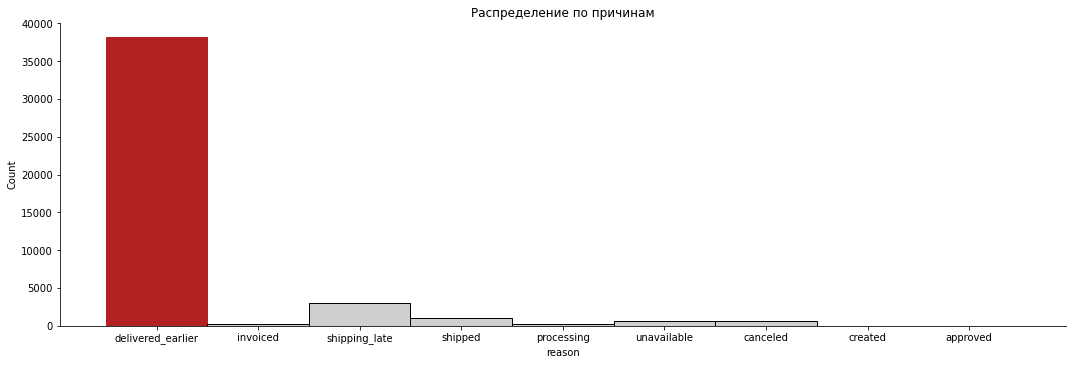

In [27]:
reasons = ['delivered']
question2(df_o, reasons)

#### Без учета доставленных раньше планируемого месяца
То есть будем считать такие заказы доставленными

Среднемесячное число недоставленных заказов: 482.08


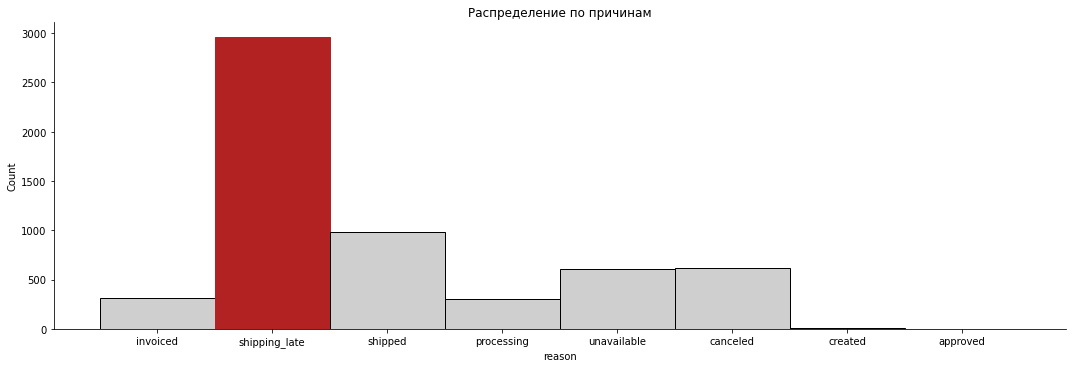

In [28]:
reasons = ['delivered', 'delivered_earlier']
question2(df_o, reasons)

#### Вывод

* Если учитывать, что случаи, когда доставка была совершена раньше предполагаемой `(delivered_earlier)`, то можно сказать, что довольно часто даем пессимистическую оценку о дате предполагаемой доставки
* Среди других причин довольно часто встречается `shipping_late` - опаздывающие продавцы

# Вопрос 3.
По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

Что будем делать:
* дата покупки `order_purchase_timestamp` содержиится в таблице с заказами `df_orders`
* не будем использовать `order_approved_at` т.к. фактическая оплата зависит не только от намерений клиента, но еще, например, от продавцов, выставляющих invoice
* так же будем игнорировать статусы т.к. разные статусы выставляются позже на разных этапах

* смержим два датасета `df_orders[['order_id', 'order_purchase_timestamp']]` и `df_orders_items`
* сгруппируем по `product_id`
* выберем самый частый день покупки товара

In [29]:
# смержим датасеты
df_purchase_date = df_order_items[['order_id', 'product_id']] \
    .merge(df_orders[['order_id', 'order_purchase_timestamp']], on='order_id')

In [30]:
# выделим день покупки
df_purchase_date['day_of_week'] = df_purchase_date.order_purchase_timestamp.dt.day_name()

# сгруппируем по product_id
df_max_purchases_a_day = df_purchase_date.groupby(by='product_id') \
    .day_of_week.value_counts().to_frame() \
    .rename(columns={'day_of_week':'counts'}) \
    .sort_values('counts', ascending=False) \
    .reset_index() \
    .groupby(by='product_id').head(1)

In [31]:
df_max_purchases_a_day.head()

,product_id,day_of_week,counts
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
8,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13,368c6c730842d78016ad823897a372db,Friday,67


In [32]:
# другой вариант (запись короче, расчет дольше)
# сгруппируем по product_id
# df_purchase_date.groupby(by='product_id', as_index=False) \
    # .agg({'day_of_week': lambda x: x.value_counts().idxmax()}) \
    # .sort_values(by=['product_id', 'day_of_week'])

In [33]:
df_dist = df_max_purchases_a_day.groupby(by='day_of_week', as_index=False) \
    .agg({'counts':'sum'}) \
    .sort_values('counts', ascending=False)

df_dist

,day_of_week,counts
1,Monday,10153
5,Tuesday,9207
6,Wednesday,8651
0,Friday,8242
4,Thursday,8130
3,Sunday,5753
2,Saturday,4999


### Визуализируем

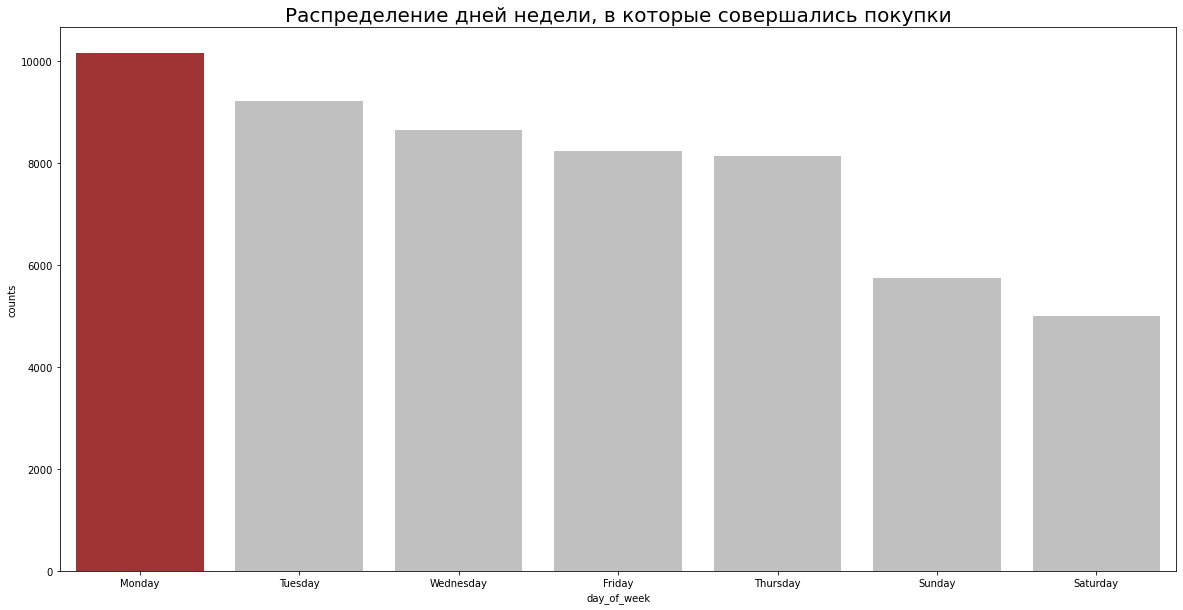

In [34]:
fig, axs = plt.subplots(1)
fig.set_figwidth(20)
fig.set_figheight(10)

clrs = [our_palette['default'] if (x < df_dist.counts.max()) else our_palette['max'] for x in df_dist.counts ]
ax = sns.barplot(data=df_dist, x='day_of_week', y='counts', palette=clrs)

ax.set_title('Распределение дней недели, в которые совершались покупки')
ax.title.set_fontsize(20)

# Вопрос 4.
Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов)

Что будем делать:
* отфильтруем НЕпокупки
    * отфильтруем статусы `'unavailable' 'canceled'`
    * остается только заказы с подтвержденной оплатой `order_approved_at`
* сгруппируем по `customer_id` и `order_approved_at`
* посчитаем количество записей
* смержим с таблицей df_customers, чтобы сгрупировать по `customer_unique_id`
* суммируем сгруппированные строки

In [36]:
# из описания данных в поле order_approved_at записано время подтверждения оплаты
# создаем колонку с меткой, что оплата была получена
df_orders['paid'] = ~df_orders.order_approved_at.isna()

In [37]:
not_paid_statuses = ['unavailable' 'canceled']
df_orders_by_month = df_orders \
    .query('paid & order_status not in @not_paid_statuses') \
    .groupby(by=['customer_id', pd.Grouper(key='order_approved_at', freq='M')]) \
    .agg({'order_id':'count'}) \
    .rename(columns={'order_id':'count_purchases'}) \
    .reset_index() \
    .merge(df_customers[['customer_id', 'customer_unique_id']], on='customer_id') \
    .groupby(by=['customer_unique_id', 'order_approved_at'], as_index=False) \
    .agg({'count_purchases': 'sum'}) \
    .sort_values(by=['count_purchases', 'order_approved_at'], ascending=False)

In [38]:
df_orders_by_month.head()

,customer_unique_id,order_approved_at,count_purchases
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-31,6
76689,c8460e4251689ba205045f3ea17884a1,2018-08-31,4
23910,3e43e6105506432c953e165fb2acf44c,2018-02-28,4
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-28,4
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09-30,4


## Проверим
Действительно ли получилось верное значение `count_purchases`
Возьмем заказчика с уникальным id `12f5d6e1cbf93dafd9dcc19095df0b3d` и посмотрим, сколько заказов он сделал

In [41]:
df_customers.query('customer_unique_id == "12f5d6e1cbf93dafd9dcc19095df0b3d"')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
28432,6152d0774bbbf74f7140541c0569dafa,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR
35693,588047d7101d88c333691e47659d7099,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR
71569,c0352e94059e3e5a714c9ad0c8306a54,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR
89230,27129ce1ebca4ffa23a049c51cc8ec95,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR
97034,ed1793d2d1e4175d5846ce7ebb4a01f5,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR
98493,a969b9f8d923bc7fd97b578f7c499194,12f5d6e1cbf93dafd9dcc19095df0b3d,82200,curitiba,PR


In [42]:
customers = df_customers.query('customer_unique_id == "12f5d6e1cbf93dafd9dcc19095df0b3d"').customer_id.to_list()
df_orders.query('customer_id in @customers')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,paid
934,747996a66f5aa711deb8ae58f5ae46a0,ed1793d2d1e4175d5846ce7ebb4a01f5,delivered,2017-01-05 15:25:10,2017-01-07 03:44:28,2017-01-11 15:59:08,2017-01-16 15:18:08,2017-02-13,True
4715,9b91ddcbd6cbceb83d4fd2462ca1f95e,6152d0774bbbf74f7140541c0569dafa,delivered,2017-01-05 14:22:02,2017-01-07 03:44:09,2017-01-11 16:25:57,2017-01-16 16:32:52,2017-02-01,True
28014,464de32dc84484c1d26df3e8e38e708b,27129ce1ebca4ffa23a049c51cc8ec95,delivered,2017-01-05 15:25:04,2017-01-07 03:35:36,2017-01-11 15:59:08,2017-01-17 16:09:40,2017-02-13,True
35818,17fed53ba6dfef9b594ee2268642e2aa,c0352e94059e3e5a714c9ad0c8306a54,delivered,2017-01-05 14:50:54,2017-01-07 03:35:35,2017-01-11 15:59:08,2017-01-16 15:24:03,2017-02-13,True
81491,ca5a215980675471f0cf8199c041909a,588047d7101d88c333691e47659d7099,delivered,2017-01-05 14:23:54,2017-01-07 03:44:16,2017-01-11 15:37:55,2017-01-17 15:14:20,2017-02-01,True
82436,8a784d47854e4cbc5562362393d504db,a969b9f8d923bc7fd97b578f7c499194,delivered,2017-01-05 14:18:03,2017-01-07 03:44:16,2017-01-11 16:08:56,2017-01-17 16:47:45,2017-02-13,True


Данные сошлись: 6 покупок в одном месяце

## Среднее за неделю

In [43]:
# количество недель в месяце посчитаем так: df_orders_by_month.order_approved_at.dt.days_in_month / 7
df_orders_by_month['week_mean'] = df_orders_by_month.count_purchases / (df_orders_by_month.order_approved_at.dt.days_in_month / 7)

In [44]:
df_orders_by_month.head()

,customer_unique_id,order_approved_at,count_purchases,week_mean
7316,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-31,6,1.354839
76689,c8460e4251689ba205045f3ea17884a1,2018-08-31,4,0.903226
23910,3e43e6105506432c953e165fb2acf44c,2018-02-28,4,1.000000
69301,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-28,4,1.000000
67664,b08fab27d47a1eb6deda07bfd965ad43,2017-09-30,4,0.933333


## Визуализируем

* округлим рассчитанное среднее
* подсчитаем количество
* судя по предыдущим исследованиям, будет много клиентов с одной покупкой, поэтому добавим log scale

In [45]:
df_week_mean_dist = df_orders_by_month.week_mean \
    .round(2) \
    .value_counts() \
    .reset_index() \
    .rename(columns={'week_mean':'counts', 'index':'week_mean'})

In [46]:
df_week_mean_dist['log_counts'] = np.log(df_week_mean_dist.counts)

In [47]:
df_week_mean_dist

,week_mean,counts,log_counts
0,0.23,88494,11.390690
1,0.25,8115,9.001469
2,0.45,743,6.610696
3,0.47,341,5.831882
4,0.50,163,5.093750
5,0.68,29,3.367296
6,0.70,13,2.564949
7,0.75,6,1.791759
8,1.00,3,1.098612
9,0.90,2,0.693147


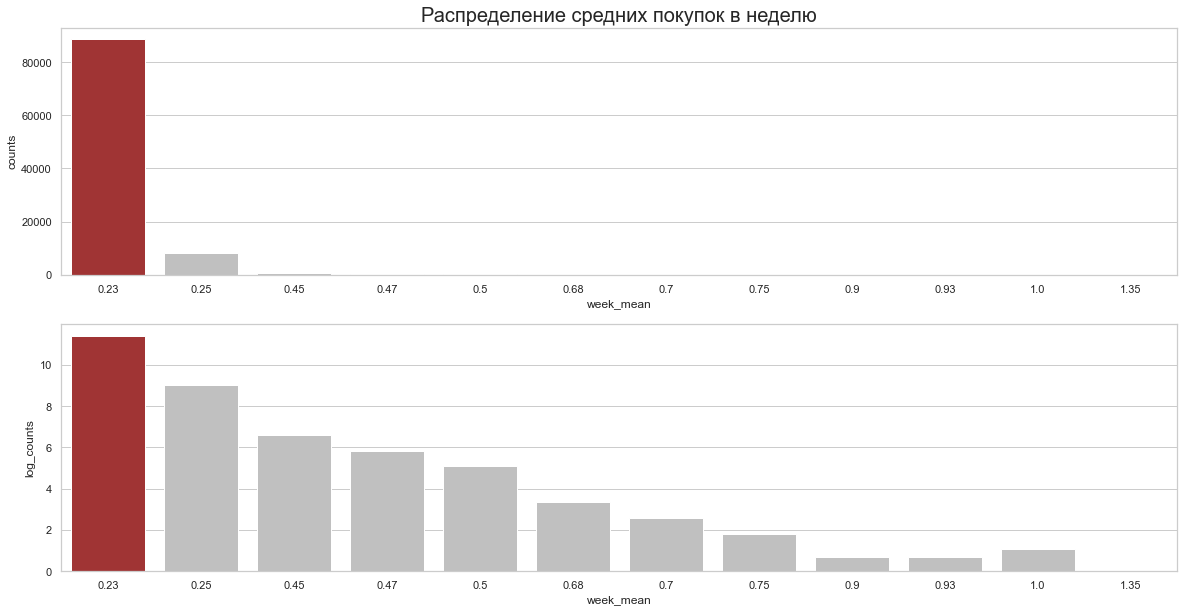

In [48]:
# создаем график, состоящий из двух частей
sns.set(style="whitegrid")

fig, axs = plt.subplots(nrows=2)
fig.set_figwidth(20)
fig.set_figheight(10)
 
# отрисовываем данные
clrs_origin = [our_palette['default'] if (x < df_week_mean_dist.counts.max()) else our_palette['max'] for x in df_week_mean_dist.counts ]
clrs_log = [our_palette['default'] if (x < df_week_mean_dist.log_counts.max()) else our_palette['max'] for x in df_week_mean_dist.log_counts ]

ax = sns.barplot(data=df_week_mean_dist, x='week_mean', y='counts', color='b', ax=axs[0], palette=clrs_origin)
ax = sns.barplot(data=df_week_mean_dist, x='week_mean', y='log_counts', color='r', ax=axs[1], palette=clrs_log)

axs[0].set_title('Распределение средних покупок в неделю')
axs[0].title.set_fontsize(20)

# показываем
plt.show()

## Вывод

* Основу составляют клиенты с `1` покупкой в месяц (или `0.23-0.25` в неделю)
* есть `1` клиент, который совершил `6` покупок (или `1.35` в неделю)

# Вопрос 5.
Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти <a href="https://vc.ru/s/productstar/134090-chto-takoe-kogortnyy-analiz" target="_blank">тут</a>. (10 баллов)

Что будем делать:
* подготовим датасет:
    * `df_orders` отфильруем по `order_status`
    * из `df_orders` возьмем только нужные колонки
    * смержим `df_orders` и `df_customers`
* создадим колонку `purchase_month`
* создадим колонку `first_purchase_month`
* создадим колонку `retention_idx` с разницей в месяцах между `purchase_month` и `first_purchase_month`
* посчитаем `retention` для каждого `retention_idx` и `purchase_month`

Подготовим датасет

In [49]:
not_paid_statuses = ['unavailable' 'canceled']
interested_columns = ['customer_id', 'order_purchase_timestamp']

df_co_cohorts = df_orders.query('order_status not in @not_paid_statuses')[interested_columns]\
    .merge(df_customers, on='customer_id') \
    .drop(columns=['customer_id'])

In [50]:
df_co_cohorts.head()

,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Cоздадим колонку `purchase_month`

In [51]:
df_co_cohorts['purchase_month'] = df_co_cohorts.order_purchase_timestamp.dt.to_period('M').dt.to_timestamp()

In [52]:
# сколько у нас есть месяцев в каждом году? и какой год выбрать для следующего шага?
pd.DataFrame({
    'y': df_co_cohorts.purchase_month.dt.year,
    'm': df_co_cohorts.purchase_month.dt.month
}).groupby('y').m.nunique()

y
2016     3
2017    12
2018    10
Name: m, dtype: int64

Фильтруем по условию с января по декабрь

In [53]:
df_co_cohorts = df_co_cohorts.query('purchase_month >= "2017-01-01" and purchase_month <= "2017-12-01"')

Cоздадим колонку `first_purchase_month`

In [54]:
df_co_cohorts['first_purchase_month'] = df_co_cohorts.groupby(by='customer_unique_id').purchase_month.transform('min')

In [55]:
df_co_cohorts = df_co_cohorts.drop(columns=['order_purchase_timestamp'])

In [56]:
df_co_cohorts.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,first_purchase_month
0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01
3,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,2017-11-01
5,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07-01,2017-07-01
6,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04-01,2017-04-01
7,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05-01,2017-05-01


Создадим колонку `cohort_idx` с разницей в месяцах между `purchase_month` и `first_purchase_month`

In [57]:
def diff_in_month(dt1 : pd.Series, dt2 : pd.Series):
    return ((dt1.dt.year - dt2.dt.year) * 12 + dt1.dt.month - dt2.dt.month) + 1

In [58]:
df_co_cohorts['retention_idx'] = diff_in_month(df_co_cohorts.purchase_month, df_co_cohorts.first_purchase_month)

In [59]:
df_co_cohorts.head()

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,purchase_month,first_purchase_month,retention_idx
0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10-01,2017-09-01,2
3,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11-01,2017-11-01,1
5,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,2017-07-01,2017-07-01,1
6,36edbb3fb164b1f16485364b6fb04c73,98900,santa rosa,RS,2017-04-01,2017-04-01,1
7,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,2017-05-01,2017-05-01,1


Посчитаем `retention` для каждого `cohort_idx` и `purchase_month`

In [60]:
def get_cohort(df, agg_column, func=pd.Series.nunique):
    # группируем по кагортной переменной и по retention_idx
    df_activity = df.groupby(['first_purchase_month', 'retention_idx'])[agg_column].apply(func).reset_index()

    df_activity['first_purchase_month'] = df_activity.first_purchase_month.dt.strftime('%Y-%m')

    # поворачиваем таблицу
    df_activity = df_activity.pivot_table(
        index = 'first_purchase_month',
        columns = 'retention_idx',
        values = agg_column)

    # в первой колонке находятся максимальные величины
    max_activiy = df_activity.iloc[:,0]

    retention = df_activity.divide(max_activiy, axis = 0).mul(100).round(2)

    return retention

In [61]:
retention = get_cohort(df_co_cohorts, 'customer_unique_id', func=pd.Series.nunique)

In [62]:
retention

retention_idx,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_month,,,,,,,,,,,,
2017-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,NaN,0.39,0.13
2017-02,100.0,0.23,0.29,0.11,0.40,0.11,0.23,0.17,0.17,0.23,0.11,NaN
2017-03,100.0,0.49,0.38,0.38,0.34,0.15,0.15,0.30,0.34,0.08,NaN,NaN
2017-04,100.0,0.59,0.21,0.17,0.34,0.25,0.34,0.30,0.30,NaN,NaN,NaN
2017-05,100.0,0.50,0.50,0.39,0.31,0.33,0.42,0.17,NaN,NaN,NaN,NaN
2017-06,100.0,0.48,0.35,0.41,0.25,0.38,0.38,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,0.51,0.36,0.26,0.28,0.21,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.69,0.33,0.26,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.68,0.53,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Визуализируем

In [63]:
ur_style = (retention
            .style
            .set_caption('Retention rate in %')  # добавляем подпись
            .background_gradient(cmap='gray')  # раскрашиваем ячейки по столбцам
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустую строку
ur_style

retention_idx,1,2,3,4,5,6,7,8,9,10,11,12
first_purchase_month,,,,,,,,,,,,
2017-01,100.0,0.39,0.26,0.13,0.39,0.13,0.52,0.13,0.13,,0.39,0.13
2017-02,100.0,0.23,0.29,0.11,0.4,0.11,0.23,0.17,0.17,0.23,0.11,
2017-03,100.0,0.49,0.38,0.38,0.34,0.15,0.15,0.3,0.34,0.08,,
2017-04,100.0,0.59,0.21,0.17,0.34,0.25,0.34,0.3,0.3,,,
2017-05,100.0,0.5,0.5,0.39,0.31,0.33,0.42,0.17,,,,
2017-06,100.0,0.48,0.35,0.41,0.25,0.38,0.38,,,,,
2017-07,100.0,0.51,0.36,0.26,0.28,0.21,,,,,,
2017-08,100.0,0.69,0.33,0.26,0.36,,,,,,,
2017-09,100.0,0.68,0.53,0.29,,,,,,,,


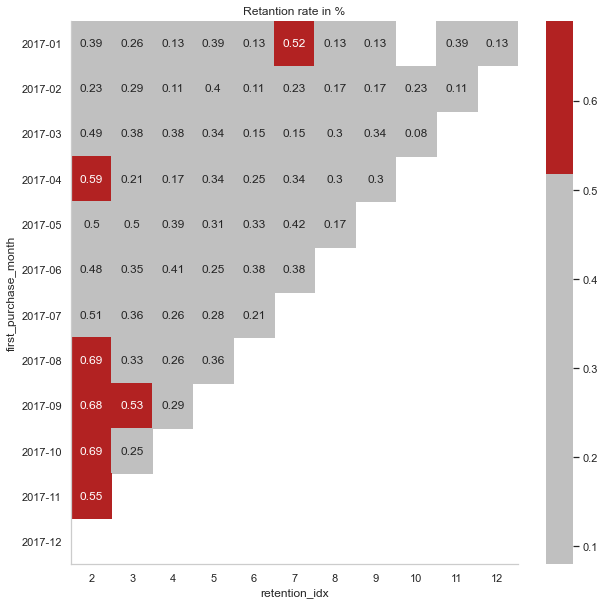

In [64]:
plt.figure(figsize = (10,10))

retention_without_1 = retention.drop(columns=[1])

values = retention_without_1.unstack().dropna().sort_values().unique()

target = retention_without_1[3].max()

clrs = [our_palette['max'] if (x >= (target - 0.05)) else our_palette['default'] for x in values]
ax = sns.heatmap(retention_without_1, annot=True, cmap=clrs)

ax.set_yticklabels(rotation=0, labels=ax.get_yticklabels())

ax.set_title('Retantion rate in %')

sns.despine()

In [65]:
retention[3].idxmax()

'2017-09'

#### Ответ 
Пользователи, совершившие первую покупку в `2017-09` месяце, демонстрируют лучший уровень удержания на третий месяц

# Вопрос 6.
Часто для качественного анализа аудитории используют подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: `R` - время от последней покупки пользователя до текущей даты, `F` - суммарное количество покупок у пользователя за всё время, `M` - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого `RFM`-сегмента построй границы метрик `recency`, `frequency` и `monetary` для интерпретации этих кластеров. Пример такого описания: `RFM`-сегмент 132 (`recency`=1, `frequency`=3, `monetary`=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти <a href="https://guillaume-martin.github.io/rfm-segmentation-with-python.html" target="_blank">тут</a>. (35 баллов)

## Что будем делать:
* Определимся, что будем считать покупкой
* Отфильтруем НЕпокупки
* Определимся с временным периодом для исследования
* Рассчитаем `текущую дату = последний день периода + 1`
* Посчитаем `RFM` метрики

## Определимся, что будем считать покупкой

Покупкой будем считать те записи в `df_orders`, для которых есть значение `order_approved_at` - время подтверждения оплаты заказа, а также отфильтруем заказы, где `order_status` не равны `unavailable` или `canceled`

In [67]:
# из описания данных в поле записано order_approved_at время подтверждения оплаты
# создаем колонку с меткой, что оплата была получена
df_orders['paid'] = ~df_orders.order_approved_at.isna()
# создадим колонку с округленной до дня датой покупки
df_orders['payment_date'] = df_orders.order_approved_at.dt.round('D')
# статусы заказов, которые не позволяют сказать, что совершена покупка
not_paid_statuses = ['unavailable' 'canceled']

## Отфильтруем НЕпокупки

In [68]:
df_paid_order = df_orders.query('order_status not in @not_paid_statuses and paid')

## Определимся с временным периодом для исследования

In [69]:
print(f'''Дата первой покупки: {df_paid_order.payment_date.min().date()}
Дата последней покупки: {df_paid_order.payment_date.max().date()}''')

Дата первой покупки: 2016-09-16
Дата последней покупки: 2018-09-04


In [70]:
# сколько у нас есть месяцев в каждом году? и какой год выбрать для следующего шага?
pd.DataFrame({
    'y': df_paid_order.payment_date.dt.year,
    'm': df_paid_order.payment_date.dt.month
}).groupby('y').m.nunique()

y
2016     3
2017    12
2018     9
Name: m, dtype: int64

### 2017 год
В качестве исследуемого периода возьмем `2017` год, так как по остальным годам данные есть не за все месяцы.

In [72]:
start_investigation_period = '2017-01-01'
end_investigation_period = '2017-12-31'
NOW = df_paid_order[df_paid_order.payment_date > end_investigation_period].payment_date.min()

In [73]:
df_paid_order = df_paid_order.query('payment_date >= @start_investigation_period and payment_date < @NOW') 

In [74]:
print(f'''Дата первой покупки: {df_paid_order.payment_date.min().date()}
Дата последней покупки: {df_paid_order.payment_date.max().date()}
"Текущая" дата: {NOW.date()}''')

Дата первой покупки: 2017-01-06
Дата последней покупки: 2017-12-31
"Текущая" дата: 2018-01-01


## Рассчитаем `RFM` метрики

### Что будем делать:

* Так как метрики мы будем считать по покупателям, то нам нужно сгруппировать по `customer_unique_id`, для этого смержим полученный датасет `df_paid_order` с `df_customers`;
* Так как для M метрики нам нужна сумма покупок за всё время, для получения этих данных смержим полученный на предыдущем шаге датасет с `df_order_items`;
* Далее сгрпируем по `customer_unique_id` и агрегируем для расчета метрик.

In [80]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [81]:
rfm = {}
rfm_columns = {}

### `R` - Recency
`R` - время от последней покупки пользователя до текущей даты.

In [82]:
# метод для агрегации payment_date и получения R метрики
rfm['payment_date'] = lambda x: (NOW - x.max()).days

rfm_columns['payment_date'] = 'Recency'

### `F` - Frequency
`F` - суммарное количество покупок у пользователя за исследуемый период.

In [83]:
# Метрику F рассчитаем как количество уникальных order_id
rfm['order_id'] = pd.Series.nunique

rfm_columns['order_id'] = 'Frequency'

### `M` - Monetary
`M` - сумма покупок за исследуемый период.

In [84]:
# Метрику M рассчитаем как сумму price
rfm['price'] = pd.Series.sum

rfm_columns['price'] = 'Monetary'

### `RFM` - Значения 

In [85]:
df_rfm = df_paid_order \
    .merge(right=df_customers, on='customer_id') \
    .merge(right=df_order_items, on='order_id') \
    .groupby(by='customer_unique_id', as_index=False) \
    .agg(rfm) \
    .rename(columns=rfm_columns)

In [86]:
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,296,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90


### `RFM` - Ранжирование

преобразуем значения, полученные на предыдущем шаге в ранг от `1` до `5`

In [87]:
quintile_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

In [88]:
quintiles = df_rfm[['Recency', 'Frequency', 'Monetary']].quantile(quintile_values).to_dict()
quintiles

{'Recency': {0.0: 1.0,
  0.2: 37.0,
  0.4: 92.0,
  0.6: 156.0,
  0.8: 232.0,
  1.0: 360.0},
 'Frequency': {0.0: 1.0, 0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0, 1.0: 9.0},
 'Monetary': {0.0: 2.29,
  0.2: 39.9,
  0.4: 68.9,
  0.6: 108.9,
  0.8: 179.98,
  1.0: 13440.0}}

In [89]:
# преобразуем к спискам
for m in quintiles:
    quintiles[m] = list(quintiles[m].values())

quintiles

{'Recency': [1.0, 37.0, 92.0, 156.0, 232.0, 360.0],
 'Frequency': [1.0, 1.0, 1.0, 1.0, 1.0, 9.0],
 'Monetary': [2.29, 39.9, 68.9, 108.9, 179.98, 13440.0]}

Нет возможности поделить `Frequency` на квантили, сделаем это через  уникальные значения отдельно.

In [90]:
quintiles['Frequency'] = np.quantile(df_rfm.Frequency.unique(), quintile_values)
quintiles

{'Recency': [1.0, 37.0, 92.0, 156.0, 232.0, 360.0],
 'Frequency': array([1. , 2.2, 3.4, 4.6, 5.8, 9. ]),
 'Monetary': [2.29, 39.9, 68.9, 108.9, 179.98, 13440.0]}

In [91]:
levels = {
    'Recency' : [5, 4, 3, 2, 1],
    'Frequency' : [1, 2, 3, 4, 5],
    'Monetary' : [1, 2, 3, 4, 5]
}

In [92]:
for l in levels:
    bins = quintiles[l]
    metric_name = l[0]
    df_rfm[metric_name] = pd.cut(df_rfm[l], bins=bins, labels=levels[l], include_lowest=True)

Комбинируем `R`, `F`, `M` метрики

In [93]:
df_rfm['rfm'] = df_rfm.R.astype(str) + df_rfm.F.astype(str) + df_rfm.M.astype(str)

In [94]:
df_rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,rfm
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,3,113
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,4,1,5,415
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211


Для интерпретации метрики именуем сегменты осмысленно. Возьмем описание сегментов из <a href='https://guillaume-martin.github.io/rfm-segmentation-with-python.html'>статьи</a>

Segment	Description
* `Champions`	Bought recently, buy often and spend the most
* `Loyal Customers`	Buy on a regular basis. Responsive to promotions.
* `Potential Loyalist`	Recent customers with average frequency.
* `Recent Customers`	Bought most recently, but not often.
* `Promising`	Recent shoppers, but haven’t spent much.
* `Customers Needing Attention`	Above average recency, frequency and monetary values. May not have bought very recently though.
* `About To Sleep`	Below average recency and frequency. Will lose them if not reactivated.
* `At Risk`	Purchased often but a long time ago. Need to bring them back!
* `Can’t Lose Them`	Used to purchase frequently but haven’t returned for a long time.
* `Hibernating`	Last purchase was long back and low number of orders. May be lost.

In [95]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

df_rfm['Segment'] = df_rfm.R.astype(str) + df_rfm.F.astype(str)
df_rfm['Segment'] = df_rfm['Segment'].replace(segt_map, regex=True)
df_rfm.head()


,customer_unique_id,Recency,Frequency,Monetary,R,F,M,rfm,Segment
0,0000f46a3911fa3c0805444483337064,296,1,69.00,1,1,3,113,hibernating
1,0000f6ccb0745a6a4b88665a16c9f078,80,1,25.99,4,1,1,411,promising
2,0004aac84e0df4da2b147fca70cf8255,47,1,180.00,4,1,5,415,promising
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114,hibernating
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,2,1,1,211,hibernating


### Визуализируем

In [96]:
df_rfm_segments = df_rfm.groupby(by='Segment') \
    .rfm.count() \
    .sort_values() \
    .reset_index() \
    .rename(columns={'rfm':'counts'})
df_rfm_segments['log_counts'] = np.log(df_rfm_segments.counts) + 1
df_rfm_segments

,Segment,counts,log_counts
0,can't loose,1,1.000000
1,loyal customers,1,1.000000
2,need attention,2,1.693147
3,at risk,4,2.386294
4,champions,4,2.386294
5,potential loyalists,38,4.637586
6,promising,8608,10.060447
7,about to sleep,8615,10.061260
8,new customers,8664,10.066932
9,hibernating,17176,10.751268


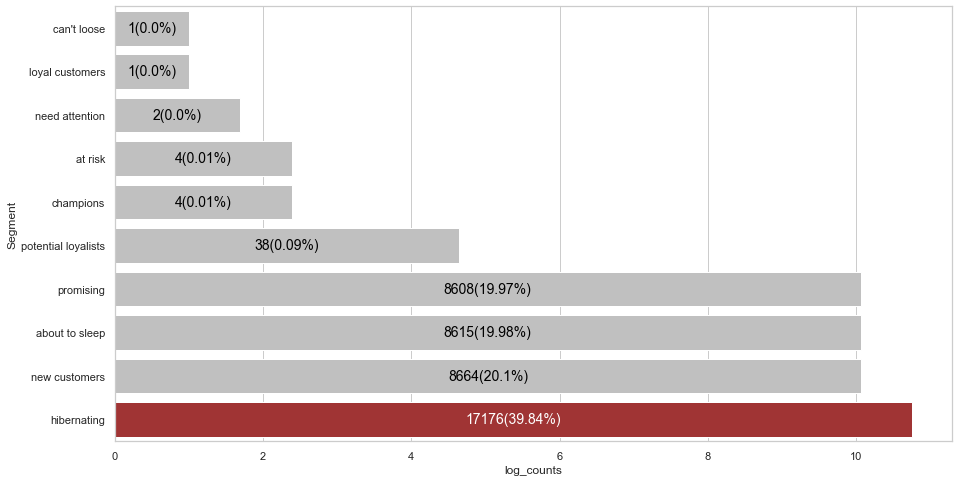

In [97]:
plt.figure(figsize=(15,8))

default_color = our_palette['default']
max_color = our_palette['max']

clrs = [default_color if (x < df_rfm_segments.counts.max()) else max_color for x in df_rfm_segments.counts ]
ax = sns.barplot(data = df_rfm_segments, y='Segment', x='log_counts', color=default_color, palette=clrs)

y = df_rfm_segments.log_counts
y_max = y.max()
real_y_sum = df_rfm_segments.counts.sum()

index = 0
for bar in ax.patches:
    real_value = df_rfm_segments.iloc[index].counts
    value = bar.get_width()
    
    color = 'black'
    # подкрасим максимум
    if value == y_max:
        color = 'w'

    tx_ofset = value / 2
    ty_offest = bar.get_y() + bar.get_height() / 2
    t_value = f'{int(real_value)}({round(real_value * 100 / real_y_sum, 2)}%)'

    ax.text(tx_ofset, ty_offest, t_value,
            ha='center',
            va='center',
            color=color,
            fontsize=14)
    
    index +=1


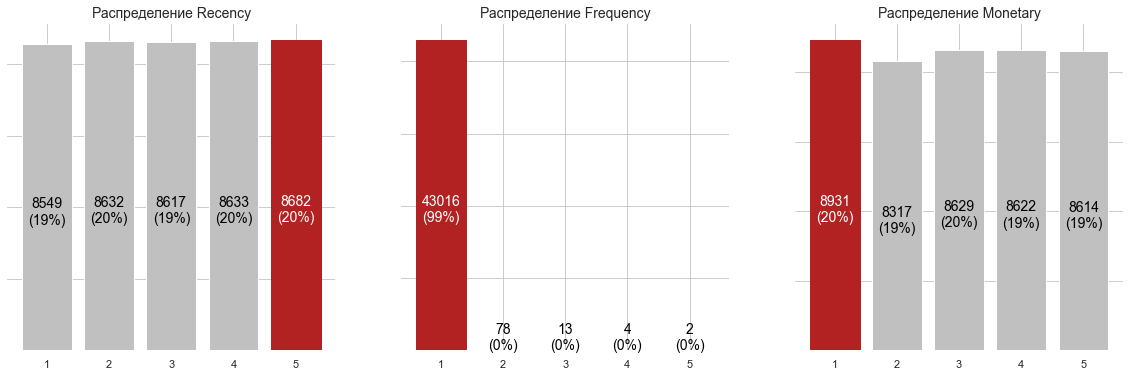

In [98]:
# график распределения
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = df_rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color=our_palette['default'])
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title(f'Распределение {parameters[p]}', fontsize=14)
    
    for bar in bars:
        value = bar.get_height()
        
        color = 'black'
        # подкрасим максимум
        if value == y.max():
            bar.set_color(our_palette['max'])
            color = 'w'
        
        # отобразим значение
        tx_ofset = bar.get_x() + bar.get_width() / 2
        ty_offest = value / 2
        t_va = 'top'
        t_value = f'{int(value)}\n({int(value * 100 / y.sum())}%)'
        
        if value <= 500:
            t_va = 'baseline'

        ax.text(tx_ofset, ty_offest, t_value,
               ha='center',
               va=t_va,
               color=color,
               fontsize=14)

plt.show()

Построим распределение метрик `M` для `RF`, но исключим данные, для которых `F` == 1

<ipython-input-99-e9b9300fd5ec>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = df_without_f1[(df_rfm['R'] == r) & (df_rfm['F'] == f)]['M'].value_counts().sort_index()


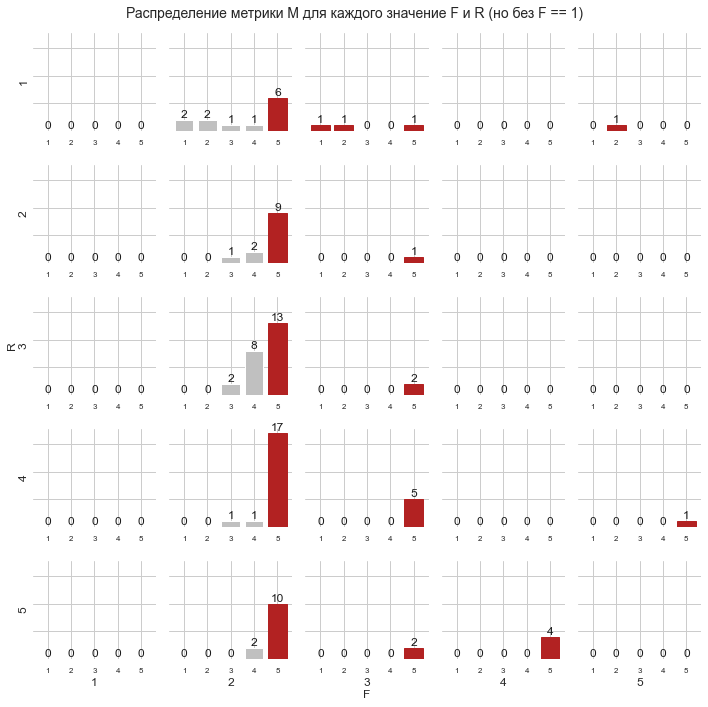

In [99]:
# plot the distribution of M for RF score (Without F == 1)
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

df_without_f1 = df_rfm[df_rfm.F > 1]

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = df_without_f1[(df_rfm['R'] == r) & (df_rfm['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color=our_palette['default'])
        if r == 5:
            if f == 3:
                ax.set_xlabel(f'{f}\nF', va='top')
            else:
                ax.set_xlabel(f'{f}\n', va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel(f'R\n{r}')
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color(our_palette['max'])
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')

fig.suptitle('Распределение метрики M для каждого значение F и R (но без F == 1)',
             fontsize=14)
plt.tight_layout()
plt.show()


### Заключение

Из метрики `F` видно, что у нас чаще всего покупают один раз, например, это данные магазина кухонных гарнитуров или сувениров в туристическом районе, в котором нет сезонности, судя по метрике `R` (или сезонность слабо различима).